# Fama-French 5 Factor Model – Beta Estimation

### 🎲 The Concept
The **Fama-French 5 Factor Model** is used to **break down a stock’s or portfolio’s returns into the key drivers behind its performance**, showing how much comes from market risk and how much comes from deeper factors like size, value, profitability, and investment style.  
The **Fama-French 5 Factor Model** (2015) expands on the CAPM by adding four more “risk premiums” to better explain stock or portfolio returns.  


### 🎲 Why it matters for investors
- Helps **understand exactly where returns come from** (market vs. factors).  
- Identifies **hidden portfolio tilts** (e.g., overweighting growth or small caps).  
- Distinguishes **true alpha** (manager skill) from simple exposure to known risk premiums.  
- Provides a foundation for **factor-based strategies** and smarter portfolio construction.

<br>  

---

<br> 

### 📉 The Formulas

**Expected Return:**  
$E(R_i) = R_f + β_m (R_m - R_f) + β_s SMB + β_v HML + β_p RMW + β_c CMA$  
$ r = R_f + β_m MER + β_s SMB + β_v HML + β_p RMW + β_c CMA $  


**Regression Formulation:**
$R_i - R_f = α + β_m (R_m - R_f) + β_s SMB + β_v HML + β_p RMW + β_c CMA + ε$

<br>

### 📉 Factor Definitions

- **$R_f$** → Risk-free rate (e.g., Treasury bills)  
- **$R_m - R_f$** → Market Excess Return (**Market Premium**)  
- **SMB (Small Minus Big)** → Small-cap vs. large-cap return (**Size Factor**)  
- **HML (High Minus Low)** → Value vs. growth return (**Value Factor**)  
- **RMW (Robust Minus Weak)** → High vs. low profitability (**Profitability Factor**)  
- **CMA (Conservative Minus Aggressive)** → Conservative vs. aggressive investment policy (**Investment Factor**)  


<br>  

---

<br> 


### ⚙️ How We Estimated the Betas

1️⃣ **Data Sources:**  
- Monthly **Fama-French 5 Factor data** via `pandas-datareader`  
- Stock price history via `yfinance`

2️⃣ **Data Preparation:**  
- Converted daily prices to **monthly returns** to match factor frequency.  

3️⃣ **Linear Regression:**  
We regress the stock’s **excess returns** ($R_i - R_f$) against the 5 factors using OLS (Ordinary Least Squares).  

**Why regression?** It finds the **best-fit line** between returns and factors. The **slopes** are the **betas**, showing sensitivity to each factor.


<br>  

---

<br> 


### 🎲 Results

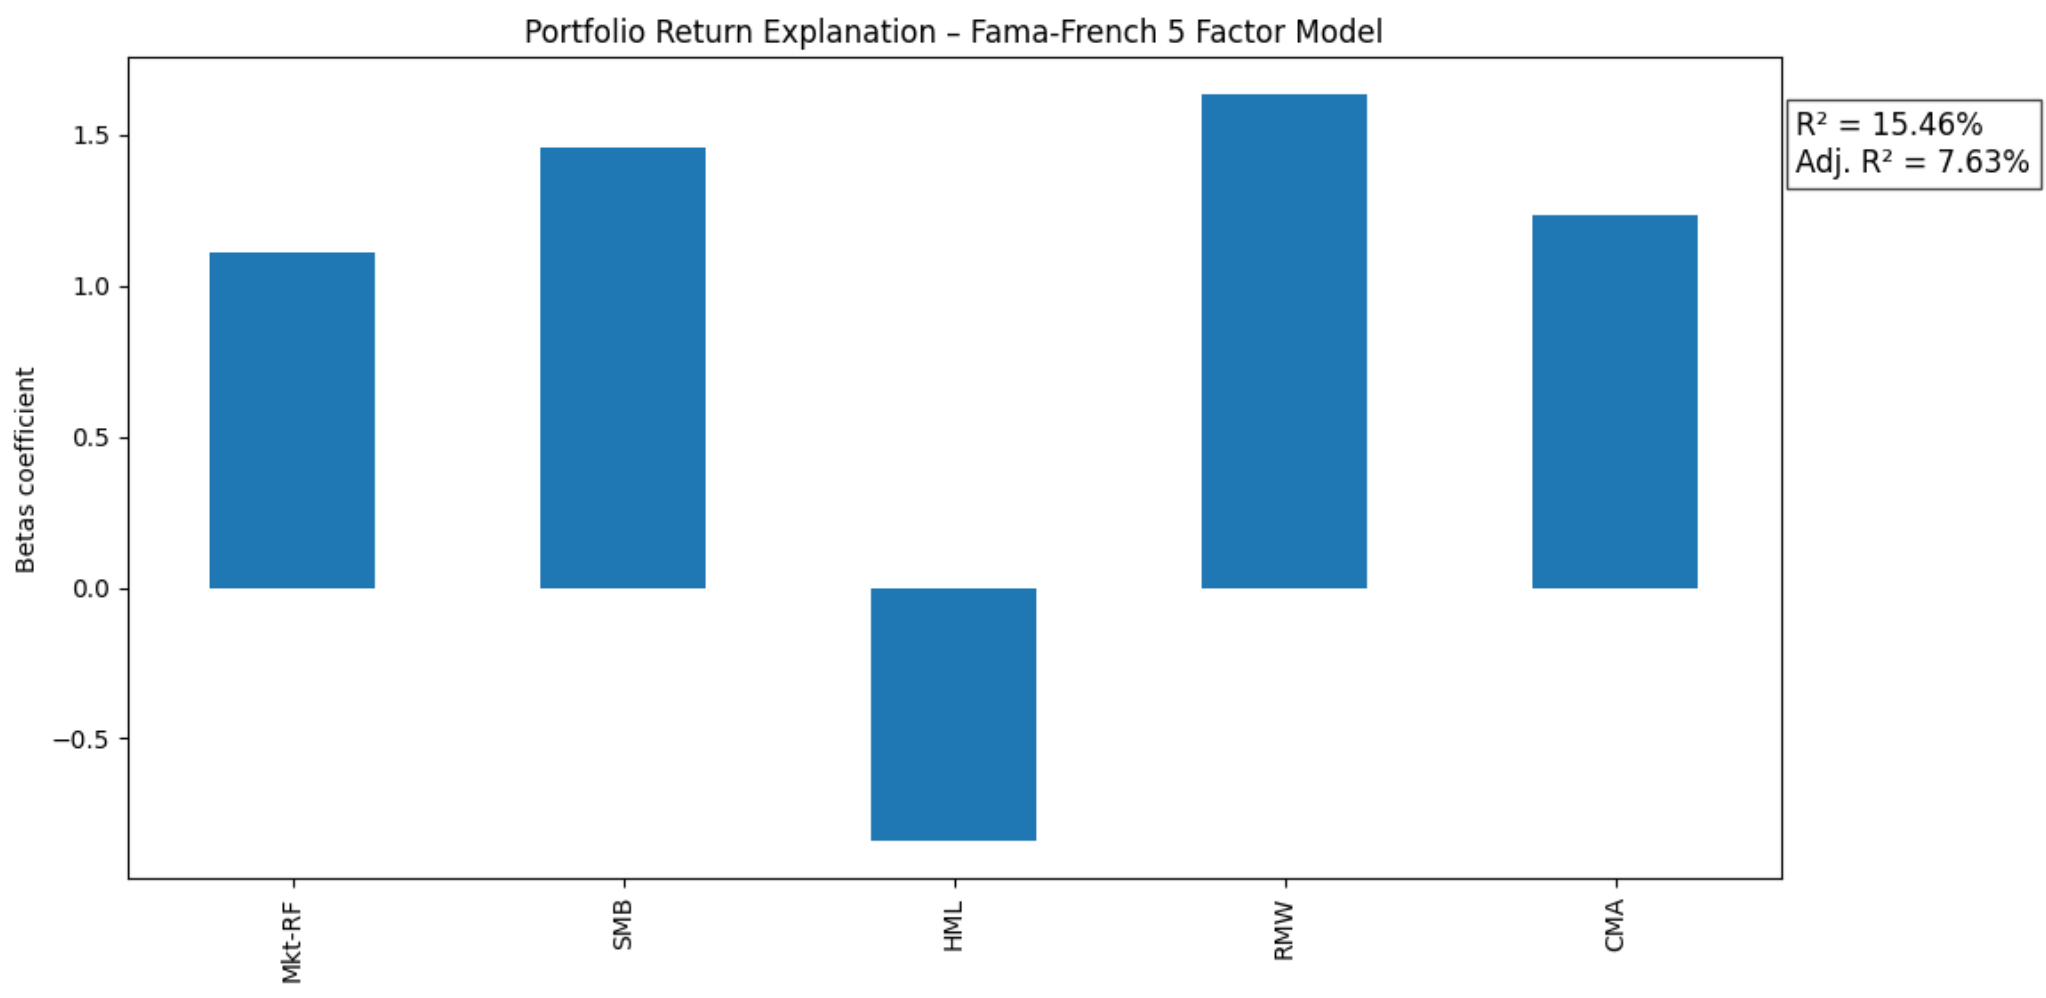



- Bars **above 0** → positive exposure to that factor.  
- Bars **below 0** → negative exposure.  
<br>
- $βMKT$ → Market exposure (β > 1 means more volatile than the market).  
- $βSMB$ → Tilt toward **small caps** (positive) or **large caps** (negative).  
- $βHML$ → Tilt toward **value stocks** (positive) or **growth stocks** (negative).  
- $βRMW$ → Exposure to **profitable firms** (positive) or **low-profitability firms** (negative).  
- $βCMA$ → Exposure to **conservative investors** (positive) or **aggressive investors** (negative).  
- $α (Alpha)$ → The portion of return **not explained by the factors** — often seen as “true alpha” or manager skill.  

<br>

### 🔍 Warning about R² Interpretation  

The **R²** (coefficient of determination) shows how much of the variation in the dependent variable (Y) is explained by the model’s factors (X) in a Multiple Regression.  

A **higher R²** means the model fits well (most movements in Y are captured by X); a **low R²** suggests missing drivers or weak explanatory power.  

**Good benchmark levels:**  
- **> 0.7:** Strong explanatory power  
- **0.4–0.7:** Moderate fit (common in finance)  
- **< 0.4:** Weak fit — model likely misses key factors.  

<br>



### The python script

In [ ]:
from datetime import datetime, timedelta

end_date = datetime.today()
years = int(input('Enter number of years you want to take into consideration (e.g : 5) : '))
start_date = end_date - timedelta(years*365)

start_date

datetime.datetime(2020, 7, 31, 11, 30, 25, 793487)

In [31]:
tickers = input('Enter your assets by their tickers and separated by a comma (e.g : AMZN, AAPL, NVDA, GOOGL)')
ticker_list = tickers.split(sep=',')
ticker_list = [t.strip() for t in ticker_list]

ticker_list

['AMZN', 'AAPL', 'NVDA', 'GOOGL']

In [32]:
weights = input('Enter your allocation for each asset separated by a comma (e.g : 0.25,0.25,0.25,0.25) : ')
weights_list = weights.split(',')
weights_int = list(map(float, weights_list))

check = 0
for weight in weights_int:
    check += weight

if check != 1:
    print("Your allocation isn't equal to 1, retype it :")

print(weights_int)
check

[0.25, 0.25, 0.25, 0.25]


1.0

In [33]:
import pandas_datareader.data as web

ff_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start= start_date, end= end_date)

# print(ff_data.keys())    voir les clés disponibles 0 pour data mensuelles, 1 pour data annuelles

monthly_factors = ff_data[0]     # données mensuelles
print(monthly_factors.head())    # bonnes datas, verifiées sur le csv téléchargé

         Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
2020-07    5.83 -3.19 -1.44  0.38  0.97  0.01
2020-08    7.62 -0.89 -3.02  4.27 -1.51  0.01
2020-09   -3.64 -0.01 -2.72 -1.38 -1.93  0.01
2020-10   -2.08  4.67  4.25 -0.77 -0.57  0.01
2020-11   12.44  7.12  2.09 -2.25  1.28  0.01


C:\Users\Xtrai\AppData\Local\Temp\ipykernel_1868\323378937.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start= start_date, end= end_date)
C:\Users\Xtrai\AppData\Local\Temp\ipykernel_1868\323378937.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start= start_date, end= end_date)


In [ ]:
# Enlève le pourcentage en divisant par 100 les data du DataFrame pandas
updated_factors = monthly_factors.div(100)

In [ ]:
import yfinance as yf

tickers_data = yf.download(ticker_list, start_date, end_date)
#tickers_data['Close']

C:\Users\Xtrai\AppData\Local\Temp\ipykernel_1868\2402096493.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tickers_data = yf.download(ticker_list, start_date, end_date)
[*********************100%***********************]  4 of 4 completed


In [52]:
# Calcul des rendements mensuels desormais pour fit avec les data mensuels de Fama & French
monthly_tickers = tickers_data.resample('M').last()
monthly_returns = monthly_tickers.pct_change()
monthly_returns['Close']

C:\Users\Xtrai\AppData\Local\Temp\ipykernel_1868\1263760127.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_tickers = tickers_data.resample('M').last()


Ticker,AAPL,AMZN,GOOGL,NVDA
Date,,,,
2020-07-31,NaN,NaN,NaN,NaN
2020-08-31,0.216569,0.090461,0.095151,0.259992
2020-09-30,-0.102526,-0.087579,-0.100600,0.011967
2020-10-31,-0.060012,-0.035754,0.102695,-0.073648
2020-11-30,0.095493,0.043440,0.085570,0.069212
...,...,...,...,...
2025-03-31,-0.081500,-0.103731,-0.090803,-0.132325
2025-04-30,-0.043353,-0.030695,0.026901,0.004982
2025-05-31,-0.053584,0.111647,0.081486,0.240635


In [66]:
# Calcul du portfolio returns en faisant la somme des rendements mensuels des actifs multipliés par leur pondération

portfolio_returns = (monthly_returns['Close'] * weights_int).sum(axis=1)
print(portfolio_returns)        # rendement du portefeuille par mois

portfolio_avg_return = portfolio_returns.mean()
print(f"Rendement moyen du portefeuille sur toute l'étendue de la date choisie : {portfolio_avg_return*100:.2f} %")     # rendement moyen du portefeuille sur toute l'étendue de la date choisie

Date
2020-07-31    0.000000
2020-08-31    0.165543
2020-09-30   -0.069685
2020-10-31   -0.016680
2020-11-30    0.073429
                ...   
2025-03-31   -0.102090
2025-04-30   -0.010541
2025-05-31    0.095046
2025-06-30    0.072072
2025-07-31    0.076088
Freq: ME, Length: 61, dtype: float64
Rendement moyen du portefeuille sur toute l'étendue de la date choisie : 2.53 %


In [ ]:
# Aligner les données sur les memes index pour pouvoir faire la régression plus tard
portfolio_returns.index = portfolio_returns.index.to_period('M')
portfolio_returns = portfolio_returns.loc[updated_factors.index]

In [74]:
# Calcul du rendement excédentaire du portfolio (portfolio returns - Risk free rate)
portfolio_exreturns = portfolio_returns - monthly_factors['RF']
# C'est l'axe Y de la régression linéaire (avec en X les différents facteurs et en beta le coefficient du plan)

In [90]:
import statsmodels.api as sm

factors = updated_factors[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Ajout d'une constante pour calculer l'alpha (α)
X = sm.add_constant(factors)

# Y = rendement excédentaire du portefeuille
Y = portfolio_exreturns

reg = sm.OLS(Y,X)

results = reg.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.975
Date:                Wed, 30 Jul 2025   Prob (F-statistic):             0.0972
Time:                        15:13:45   Log-Likelihood:                 17.136
No. Observations:                  60   AIC:                            -22.27
Df Residuals:                      54   BIC:                            -9.707
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2177      0.026     -8.227      0.0

In [ ]:
# Derniers préparatifs avant de plot !
alpha = results.params['const']  
betas = results.params.drop('const')    # Garde seulement les facteurs soit les betas

final_factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
betas = betas[final_factors]            # filtre seulement ces facteurs

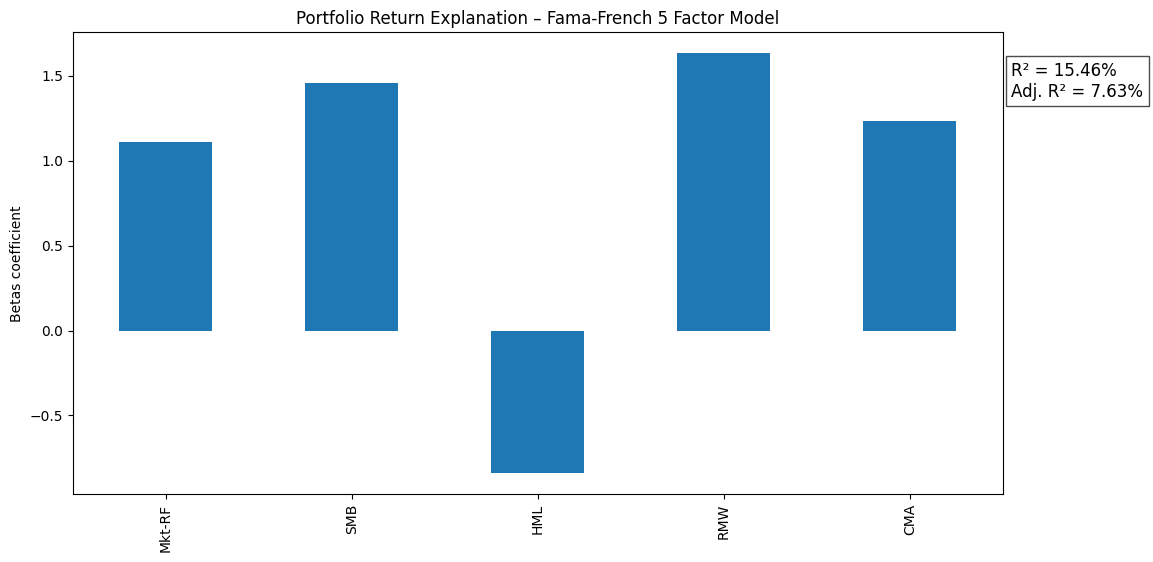

In [113]:
# C'est la fin, on plot !
import matplotlib.pyplot as plt
betas.plot(kind='bar', figsize=(12,6),)
plt.ylabel('Betas coefficient')
plt.title('Portfolio Return Explanation – Fama-French 5 Factor Model')

# Ajout du R-squared et Adjusted R-squared sur le graphique
r_squared = results.rsquared * 100          # R² en %
r_squared_adj = results.rsquared_adj * 100  # R² ajusté en %
x_pos = plt.xlim()[1] * 1.01   
y_pos = plt.ylim()[1] * 0.9   
plt.text(x=x_pos, y=y_pos,
         s=f"R² = {r_squared:.2f}%\nAdj. R² = {r_squared_adj:.2f}%",
         fontsize=12,
         ha='left', va='top',
         bbox=dict(facecolor="white", alpha=0.7))


plt.show()